### Read the Backpropagation Algorithm first

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Taking a regression dataset
# Price increased according to room number and size
df = pd.DataFrame([[8,10,8],[5,6,5],[9,7,7],[3,5,4]], columns=['room', 'size', 'price'])
#df = pd.DataFrame([[2,3,8]], columns=['room', 'size', 'price'])

In [ ]:
df

,room,size,price
0,8,10,8
1,5,6,5
2,9,7,7
3,3,5,4


In [ ]:
# this function initialize random weights and return it
def initialize():
  #layer 1 weights and biases
  w11_1 = 1.2
  w21_1 = 0.1
  w12_1 = 0.1
  w22_1 = 0.1
  b11 = 0
  b12 = 1


  #layer 2 weights and biases
  w11_2 = 0.1
  w21_2 = 0.1
  b21 = 0


  return w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21

In [ ]:
# calculate and return the value predicted by our model
def forward_propagation(r,sz,w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21):
  o11 = w11_1*r+w21_1*sz+b11
  o12 = w12_1*r+w22_1*sz+b12
  o21 = o11*w11_2+o12*w21_2+b21
  return o11,o12,o21


In [ ]:
# Taking the values from our dataset
# Initially df is a dataframe with column names, but we want the values only.
X = df[['room','size']].values
y = df['price'].values

In [ ]:
def backpropagation(X,Y):
  losses=[]
  epoch_losses=[]
  w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21=initialize()
  epochs=200
  print("Inital Weights:",w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21)


# The outer loop decides how many times we take the whole dataset (known as Epoch)
# The inner loop takes every data point and updates weights using backpropagation

  for epcoh in range(epochs): # epoch is 25, you can change it
    for i in range(X.shape[0]): # shape[0] defines the row number of X
      r = X[i][0]
      sz = X[i][1]
      o11,o12,o21 = forward_propagation(r,sz,w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21)
      y_hat = o21
      #print("y_hat",y_hat)
      y = Y[i]
      loss = (y-y_hat)**2
      #print("loss:",loss)
      losses.append(loss)
      #updating parameters

      #layer 2
      w11_2 = w11_2- (0.001*(-2*(y-y_hat)*o11))
      w21_2 = w21_2- (0.001*(-2*(y-y_hat)*o12))
      b21 = b21- 0.001*(-2*(y-y_hat))


      #layer 1 Neuron 1
      w11_1 = w11_1- (0.001*(-2*(y-y_hat)*w11_2*r))
      w21_1 = w21_1- (0.001*(-2*(y-y_hat)*w11_2*sz))
      b11 = b11- (0.001*(-2*(y-y_hat)*w11_2))

      w12_1 = w12_1- (0.001*(-2*(y-y_hat)*w21_2*r))
      w22_1 = w22_1- (0.001*(-2*(y-y_hat)*w21_2*sz))
      b12 = b12- (0.001*(-2*(y-y_hat)*w21_2))

    parameters = ["%.2f" % v for v in (w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21)]  
    #print('parameters:',w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21)
    #print(twodecimals)
    epoch_loss = np.array(losses).mean()
    epoch_losses.append(epoch_loss)
    #print("loss:",epoch_loss)
    print(f'Parameters:{parameters}  loss:{epoch_loss:.2f}')
  return w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21,epoch_losses

In [ ]:
w11_1,w21_1,w12_1,w22_1,b11,b12,w11_2,w21_2,b21,epoch_losses=backpropagation(X,y)

Inital Weights: 1.2 0.1 0.1 0.1 0 1 0.1 0.1 0
Parameters:['1.26', '0.17', '0.13', '0.13', '0.01', '1.00', '0.38', '0.18', '0.03']  loss:16.76
Parameters:['1.29', '0.21', '0.14', '0.15', '0.01', '1.01', '0.48', '0.21', '0.04']  loss:9.81
Parameters:['1.30', '0.22', '0.15', '0.16', '0.02', '1.01', '0.51', '0.22', '0.04']  loss:6.80
Parameters:['1.30', '0.23', '0.15', '0.16', '0.02', '1.01', '0.51', '0.22', '0.05']  loss:5.24
Parameters:['1.30', '0.23', '0.15', '0.16', '0.02', '1.01', '0.51', '0.23', '0.05']  loss:4.29
Parameters:['1.30', '0.24', '0.15', '0.17', '0.02', '1.01', '0.51', '0.23', '0.05']  loss:3.66
Parameters:['1.30', '0.24', '0.15', '0.17', '0.02', '1.01', '0.51', '0.23', '0.05']  loss:3.21
Parameters:['1.30', '0.24', '0.15', '0.17', '0.02', '1.01', '0.51', '0.23', '0.05']  loss:2.87
Parameters:['1.30', '0.25', '0.15', '0.17', '0.02', '1.01', '0.51', '0.23', '0.05']  loss:2.61
Parameters:['1.30', '0.25', '0.15', '0.17', '0.02', '1.01', '0.50', '0.24', '0.05']  loss:2.40
Par

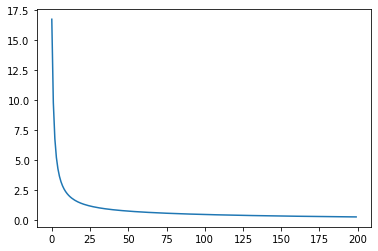

In [ ]:
# This plot will show the loss curve over time.
# clearly the loss is decreasing each time.
x = np.arange(200)
plt.plot(x,epoch_losses)

Actual:4 Predicted:3.806671953657124
Actual:5 Predicted:5.04564298760106
Actual:4 Predicted:3.806671953657124
Actual:7 Predicted:7.151546346807214
Actual:4 Predicted:3.806671953657124
Actual:8 Predicted:7.83419631022125
Actual:5 Predicted:5.04564298760106
Actual:8 Predicted:7.83419631022125
Actual:4 Predicted:3.806671953657124
Actual:7 Predicted:7.151546346807214


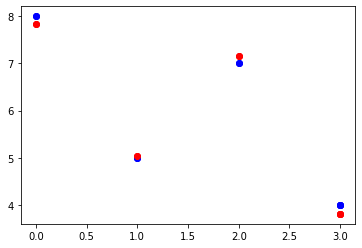

In [ ]:
# visualizing the actual prediction and our model prediction
# Blue is actual values, red is predicted by our model
# more epochs may improve the loss 

fig,ax = plt.subplots()
for i in range(10):
  sample = np.random.randint(4)
  o11=(w11_1* df['room'][sample])+(w21_1*df['size'][sample])+b11
  o12=(w12_1* df['room'][sample])+(w22_1*df['size'][sample])+b12
  o21=(o11*w11_2)+(o12*w21_2)+b21
  actual = df['price'][sample]
  ax.scatter(sample,actual,color='b')
  ax.scatter(sample,o21,color='r')
  print(f'Actual:{actual} Predicted:{o21}')